In [19]:
import os
import glob
import numpy as np
from PIL import Image
Image.MAX_IMAGE_PIXELS=None
import pandas as pd
from natsort import natsorted
from openslide import OpenSlide
from skimage.measure import label
from skimage.morphology import remove_small_objects
from matplotlib import pyplot as plt
import cv2
# %matplotlib nbagg
import matplotlib.pyplot as plt
# from mpldatacursor import datacursor

In [20]:
%%timeit
dl = r'\\fatherserverdw\Q\research\images\skin_aging\1um\classification_v9_combined\12.tif'
dl = Image.open(dl)
roi = r'\\fatherserverdw\Q\research\images\skin_aging\annotation\roi\tif\12_tissue_binary.tif'
roi = Image.open(roi)
roi = roi.resize(dl.size)
roiarr = np.array(roi)
dlarr = np.array(dl)
dlarr = dlarr*roiarr

2.04 s ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [112]:
minszs = [100000,100000,1000,1000,1000,1000,1000,1000,1000,10000,1000] # 11 elements
dist_layers = np.zeros_like(dlarr).astype(np.float16)
dist_layers = np.repeat(dist_layers[np.newaxis,...], len(minszs), axis=0)
dist_layers.shape

(11, 13840, 40938)

In [113]:
for idx,minsz in enumerate(minszs[0:2]):
    dltmp = dlarr==idx+1
    dltmp2 = remove_small_objects(dltmp,minsz)
    dist = cv2.distanceTransform(np.invert(dltmp2).astype(np.uint8), cv2.DIST_L2, 3)
    dist_layers[idx,...] = dist
dist_layers.shape

(11, 13840, 40938)

In [114]:
dist_layers.dtype

dtype('float16')

In [115]:
dist.dtype

dtype('float32')

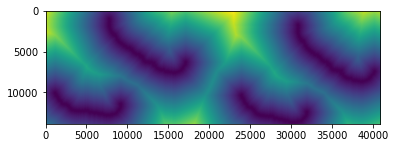

In [120]:
plt.imshow(dist_layers[1,...])

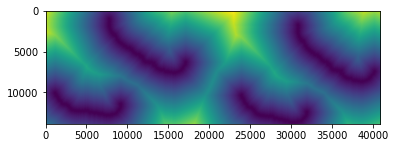

In [119]:
plt.imshow(dist)

In [96]:
dist_layers.dtype

dtype('uint8')

In [23]:
ndpi =OpenSlide(r'\\fatherserverdw\Q\research\images\skin_aging\wsi\12.ndpi')
ndpiw, ndpih = ndpi.dimensions
dlw, dlh = dl.size

rsfw_ndpi2dl = ndpiw / dlw
rsfh_ndpi2dl = ndpih / dlh

In [77]:
json = pd.read_pickle(r'\\fatherserverdw\Q\research\images\skin_aging\wsi\hovernet_out\df\379.pkl')

In [78]:
json.head()

,bbox,centroid,contour,type,inroi,resident_area,c2t_distance,Area,Perimeter,Circularity,...,orientation,AspectRatio,Sol,Extent,EquiDia,imID,dist2nearest,oriA,oriB,local_align
0,"[[416, 16074], [425, 16083]]","[1741.5892857142858, 14755.44642857143]","[[1739, 14752], [1739, 14753], [1738, 14754], ...",9,0,65994,"[45, 219, 22, 185, 180, 0, 25, 164, 78, 77, 140]",44.0,26.142135,0.809059,...,40.360336,0.935515,0.946237,0.543210,7.484821,379,118.228592,61.355110,94.717224,0.418646
1,"[[432, 16188], [442, 16201]]","[1858.4411764705883, 14772.779411764706]","[[1863, 14768], [1862, 14769], [1859, 14769], ...",9,0,65994,"[15, 190, 7, 156, 151, 0, 227, 134, 63, 26, 125]",52.0,35.798989,0.509884,...,61.355110,0.425288,0.818898,0.400000,8.136858,379,118.228592,40.360336,16.506689,0.569421
2,"[[723, 15870], [737, 15879]]","[1537.8354430379748, 15065.632911392406]","[[1534, 15059], [1534, 15065], [1536, 15067], ...",10,0,320081,"[205, 116, 195, 89, 84, 0, 55, 137, 67, 144, 57]",63.0,34.970562,0.647359,...,152.422852,0.400691,0.933333,0.500000,8.956232,379,371.101064,40.360336,61.355110,0.703210
3,"[[1065, 16218], [1081, 16224]]","[1884.6265060240964, 15408.55421686747]","[[1884, 15401], [1883, 15402], [1883, 15404], ...",10,0,320081,"[246, 165, 136, 131, 126, 0, 96, 178, 107, 223...",65.0,36.485281,0.613603,...,0.705199,0.411420,0.962963,0.677083,9.097284,379,487.911877,152.422852,160.417587,0.861032
4,"[[292, 13961], [310, 13973]]","[1679.0168067226891, 12589.941176470587]","[[1680, 12580], [1681, 12581], [1680, 12582], ...",9,0,65994,"[229, 147, 72, 113, 47, 0, 81, 70, 215, 36, 205]",100.0,47.455843,0.557995,...,22.431295,0.439985,0.858369,0.462963,11.283792,379,363.232708,50.036007,61.128773,0.447481


In [95]:
np.max(json['c2t_distance'].tolist())

255

In [80]:
pd.DataFrame(json['c2t_distance'].tolist())

,0,1,2,3,4,5,6,7,8,9,10
0,45,-37,22,-71,-76,0,25,-92,78,77,-116
1,15,-66,7,-100,-105,0,-29,-122,63,26,125
2,-51,116,-61,89,84,0,55,-119,67,-112,57
3,-10,-91,-120,-125,126,0,96,-78,107,-33,62
4,-27,-109,72,113,47,0,81,70,-41,36,-51
...,...,...,...,...,...,...,...,...,...,...,...
64634,-50,102,34,-99,95,97,-46,104,-98,-44,43
64635,-40,112,64,-90,125,107,-16,-122,-68,-15,73
64636,-50,102,49,-99,110,97,-31,119,-83,-30,58
64637,-39,112,-116,39,-90,-46,46,-46,-65,72,-108


In [61]:
json[['Dcorneum','Dspinosum','Dshaft','Dfollicle','Dmuscle','Doil','Dsweat','Dnerve','Dblood','Decm','Dfat']] = pd.DataFrame(json.c2t_distance.tolist())

In [62]:
json[['Dcorneum','Dspinosum','Dshaft','Dfollicle','Dmuscle','Doil','Dsweat','Dnerve','Dblood','Decm','Dfat']]

,Dcorneum,Dspinosum,Dshaft,Dfollicle,Dmuscle,Doil,Dsweat,Dnerve,Dblood,Decm,Dfat
0,-21,-56,102,84,-28,123,-4,-23,-77,-54,51
1,60,25,-72,-90,54,-52,108,59,4,103,-123
2,30,-5,-102,-120,24,-82,48,29,-26,-2,103
3,-50,-85,73,55,-56,94,-33,-52,-106,-83,22
4,13,-22,-120,118,6,-99,39,11,-43,-20,85
...,...,...,...,...,...,...,...,...,...,...,...
106861,-50,118,78,-66,31,-55,87,-4,-113,87,28
106862,-12,-99,117,-26,71,-16,126,35,-73,127,46
106863,-39,-127,89,-54,43,-44,99,7,-101,99,34
106864,-59,110,71,-72,24,-62,80,-12,-119,80,26


In [63]:
json['c2t_distance'][0]

[235, 200, 102, 84, 228, 123, 252, 233, 179, 202, 51]

In [43]:
def find_c2tdist(cnt,dldist,rsfw_ndpi2dl,rsfh_ndpi2dl):
    distances = [_[int(cnt[1]//rsfh_ndpi2dl),int(cnt[0]//rsfw_ndpi2dl)] for _ in dldist]
    # try:
    #     distances = [_[int(cnt[0]//rsfw_ndpi2dl), int(cnt[1]//rsfh_ndpi2dl)] for _ in dldist]
    # except:
    #     print([int(cnt[0]//rsfw_ndpi2dl), int(cnt[1]//rsfh_ndpi2dl)] )
    return distances

In [42]:
json['c2t_distance'] = json['centroid'].apply(lambda centroid: find_c2tdist(centroid, dist_layers, rsfw_ndpi2dl, rsfh_ndpi2dl))
json[['Dcorneum','Dspinosum','Dshaft','Dfollicle','Dmuscle','Doil','Dsweat','Dnerve','Dblood','Decm','Dfat']] = pd.DataFrame(json.c2t_distance.tolist())

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [18]:
cnt = [100,1000]
[_[cnt[0]//2, cnt[1]//2] for _ in dist_layers]

[71, 94, 0, 92, 242, 232, 0, 227, 253, 168, 125]

In [ ]:
json = pd.read_pickle(r'\\fatherserverdw\Q\research\images\skin_aging\wsi\hovernet_out\df\12.pkl')

ndpi =OpenSlide(r'\\fatherserverdw\Q\research\images\skin_aging\wsi\12.ndpi')

dlw, dlh = dl.size
roiw, roih = roi.size
ndpiw, ndpih = ndpi.dimensions
rsfw_ndpi2dl = ndpiw / dlw
rsfh_ndpi2dl = ndpih / dlh

roi = roi.resize(dl.size)

roiarr = np.array(roi)
roiarrL = label(roiarr)
dlarr = np.array(dl)

dltmp = dlarr==10
dltmp2 = remove_small_objects(dltmp,100000)
plt.imshow(dltmp2)
#distance from tissue components

dist = cv2.distanceTransform(np.invert(dltmp2).astype(np.uint8), cv2.DIST_L2, 3)
cv2.normalize(dist, dist, 0, 1.0, cv.NORM_MINMAX)
cv2.imshow('Distance Transform Image', dist)